In [1]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from pathlib import Path

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python
def deEmojify(text):
    emoj = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642"
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030"
        "]+",
        re.UNICODE,
    )
    return re.sub(emoj, " ", text)

In [3]:
text = Path("../p4a-portal/comments.txt").read_text(encoding="utf-8")
len(text)

297116

In [4]:
text = deEmojify(text)
len(text)

296734

In [5]:
text = "\n".join([row.strip() for row in text.splitlines() if row.split()])
len(text)

296178

In [6]:
text = text.replace("!", " ").replace("?", " ").replace(".", " ")
len(text)

296178

In [7]:
print(sorted(STOPWORDS))

['a', 'about', 'above', 'after', 'again', 'against', 'all', 'also', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', "can't", 'cannot', 'com', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during', 'each', 'else', 'ever', 'few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'hence', 'her', 'here', "here's", 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me', 'more', 'most', "mustn't", 'my', 'myself', 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'r', 'same', 'shall', "shan't", 'she', "she'd", "she'll", "she's", 

In [8]:
stopwords = {
    "and",
    "a",
    "do",
    "for",
    "the",
    "is",
    "my",
    "it",
    "in",
    "i",
    "r",
    "have",
    "am",
    "or",
}
stopwords.update({x for x in STOPWORDS if x.startswith("i'")})
stopwords

{'a',
 'am',
 'and',
 'do',
 'for',
 'have',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'in',
 'is',
 'it',
 'my',
 'or',
 'r',
 'the'}

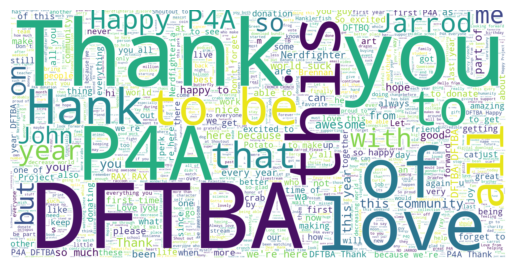

In [9]:
wc = WordCloud(
    background_color="white",
    max_words=2000,
    stopwords=stopwords,
    width=2000,
    height=1000,
)
wc.generate(text)
wc.to_file("all.png")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [10]:
def generate_cloud(map_file):
    mask = np.array(Image.open(Path(map_file)))
    wc = WordCloud(
        background_color="white",
        max_words=2000,
        mask=mask,
        stopwords=stopwords,
        random_state=42,
    )
    wc.generate(text)
    wc.to_file(map_file.replace(".png", "-normal-cloud.png"))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    plt.show()

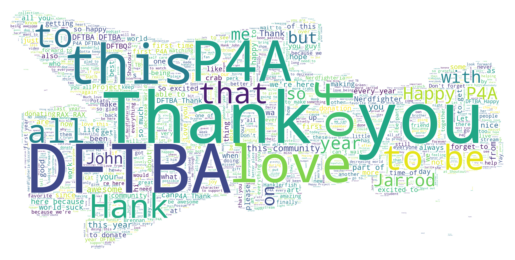

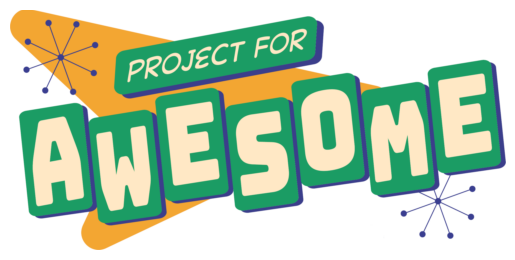

CPU times: user 16.7 s, sys: 424 ms, total: 17.1 s
Wall time: 16.9 s


In [11]:
%time generate_cloud("original.png")

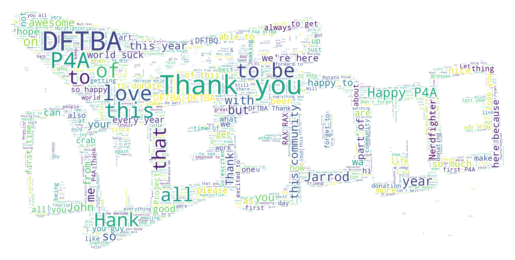

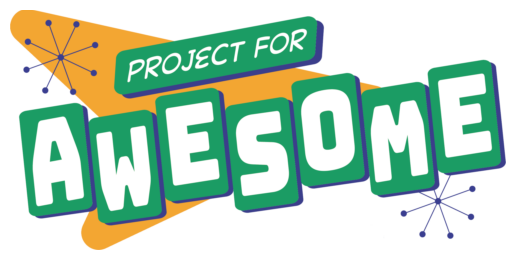

CPU times: user 18.7 s, sys: 518 ms, total: 19.2 s
Wall time: 18.9 s


In [12]:
%time generate_cloud("original-white-text.png")

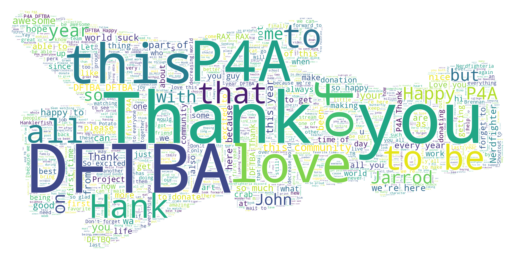

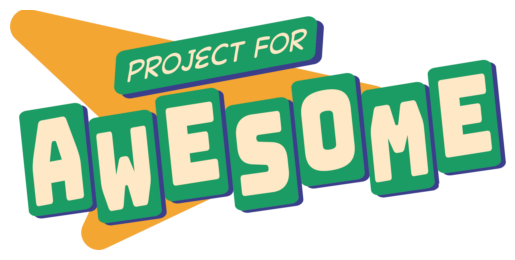

CPU times: user 16.7 s, sys: 506 ms, total: 17.2 s
Wall time: 17 s


In [13]:
%time generate_cloud("original-minus-atom.png")

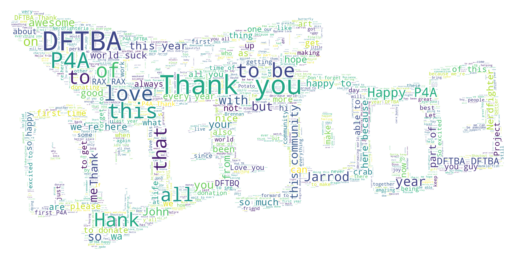

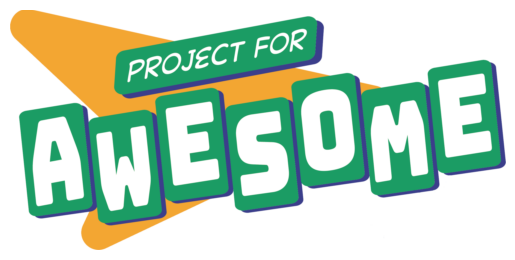

CPU times: user 16.7 s, sys: 499 ms, total: 17.2 s
Wall time: 16.9 s


In [14]:
%time generate_cloud("original-white-text-minus-atom.png")

In [15]:
def colourful_cloud(map_file):
    mask = np.array(Image.open(Path(map_file)))
    image_colors = ImageColorGenerator(mask)
    wc = WordCloud(
        background_color="white",
        max_words=2000,
        mask=mask,
        stopwords=stopwords,
        color_func=image_colors,
        random_state=42,
    )
    wc.generate(text)
    wc.to_file(map_file.replace(".png", "-colour-cloud.png"))

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    plt.show()

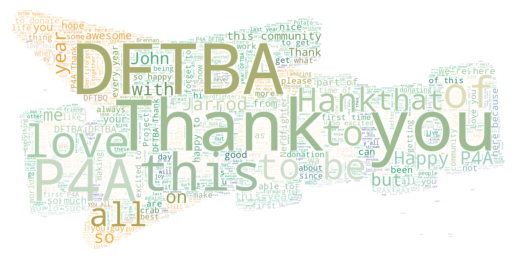

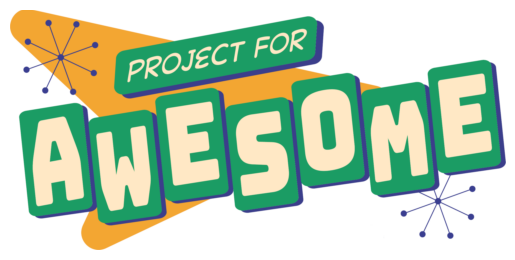

CPU times: user 17.3 s, sys: 550 ms, total: 17.9 s
Wall time: 17.6 s


In [16]:
%time colourful_cloud("original.png")

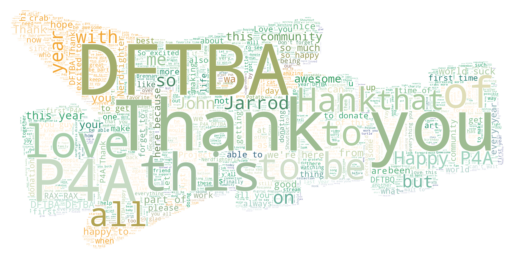

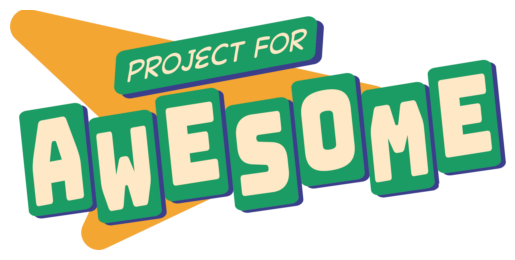

CPU times: user 17.4 s, sys: 525 ms, total: 17.9 s
Wall time: 17.7 s


In [17]:
%time colourful_cloud("original-minus-atom.png")

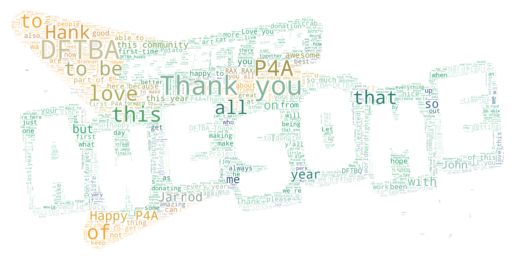

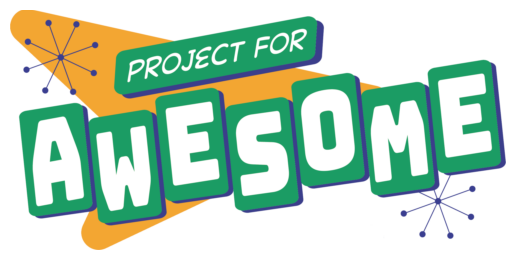

CPU times: user 17.7 s, sys: 570 ms, total: 18.3 s
Wall time: 18 s


In [18]:
%time colourful_cloud("original-white-text.png")

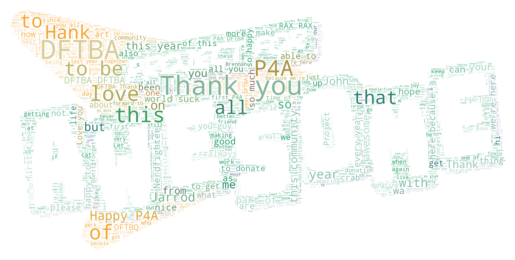

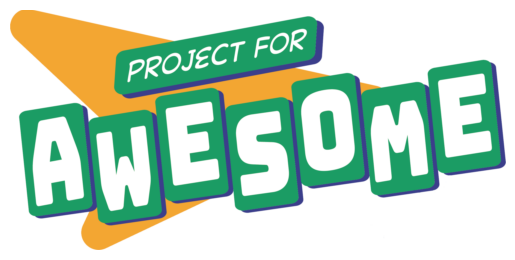

CPU times: user 17.9 s, sys: 568 ms, total: 18.5 s
Wall time: 18.2 s


In [19]:
%time colourful_cloud("original-white-text-minus-atom.png")

In [20]:
cloud = Image.open("original-white-text-minus-atom-colour-cloud.png")
outline = Image.open("outline.png")
cloud.paste(outline, (0, 0), outline)
cloud.save("original-white-text-minus-atom-colour-outline-cloud.png")